## 

**✅ Section 1 Dataset: In Markdown, explain what dataset you chose and why you chose it. Include why is it meaningful to you and how you went about finding it. Then, in Python, load your dataset into a DataFrame.**

I am choosing the historical data of Google stock prices. This is because Google is a major tech company that can tell us the growth of the tech industry and how the overall market is doing. Understanding how Google stock can provide insights into technological trends and the company's overall financial stability. This can be the most important thing for investors because it helps them to make informed decisions about their financial portfolios. To obtain the data, I was able to upload the data from Yahoo Finance, a reputable financial data platform. It can give me the historical data in a CSV file.

In [5]:
import pandas as pd
df = pd.read_csv("GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4846,2023-11-17,137.820007,138.000000,135.479996,136.940002,136.940002,25565300
4847,2023-11-20,135.500000,138.425003,135.490005,137.919998,137.919998,19569400
4848,2023-11-21,137.940002,138.964996,137.705002,138.619995,138.619995,17648100
4849,2023-11-22,139.100006,141.100006,139.000000,140.020004,140.020004,17306400


**✅ Section 2 Exploratory Data Analysis: In Markdown, explain what descriptive statistics can help you give a broad overview of the data (ex: size, shape, interesting descriptive statistics, etc.). In Python, do this exploratory data analysis.**

1. Identifying the top three highest stock prices that can help reveal extreme values and potential outliers, offering insights into significant entry points for investors during the given period.

In [57]:
top3 = df.nlargest(3, 'Open')
top3

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Avg
4395,2022-02-02,151.863495,152.100006,145.557495,148.036499,148.036499,89750000,139.226000
4345,2021-11-19,151.000000,151.850006,149.887497,149.952499,149.952499,19766000,145.019350
4346,2021-11-22,150.141754,150.744507,147.005493,147.078506,147.078506,24608000,145.293716


2. Calculating the average stock prices for opening, closing, high, and low provides a measure of central tendencies for these different price points.

In [59]:
findavg = df[["Open", "Close", "High", "Low"]]
avg = findavg.mean()
print(avg.to_string())

Open     41.342103
Close    41.359819
High     41.781007
Low      40.922001


3. Determining the median stock prices for opening, closing, high, and low gives insight into the middle values of these price points.

In [61]:
findmedium = df[["Open", "Close", "High", "Low"]]
medium = findmedium.median()
print(medium.to_string())

Open     26.488464
Close    26.494759
High     26.705999
Low      26.278851


4. Exploring the quantiles of the stock prices, such as the 25th, 50th (median), and 75th percentiles, provides a detailed understanding of the distribution, helping identify the spread of the data and detect potential patterns or irregularities in the stock price dataset.


In [62]:
findquantiles = df[["Open", "Close", "High", "Low"]]
quantiles = findquantiles.quantile([0.25, 0.5, 0.75])
print(quantiles.to_string())

           Open      Close       High        Low
0.25  12.840620  12.830907  12.951455  12.706124
0.50  26.488464  26.494759  26.705999  26.278851
0.75  57.303749  57.480249  57.921999  56.750500


5. Identifying and exploring potential outliers in the stock price data helps to pinpoint extreme values that might significantly deviate from the overall distribution, providing insights into unusual market behaviors or exceptional events that affected the stock prices.


In [45]:
print("Outliers in Stock Prices:")
sample = df['Open']
Q1 = sample.quantile(0.25)
Q3 = sample.quantile(0.75)
IQR = Q3 - Q1
outliers = (sample < Q1 - 1.5 * IQR) | (sample > Q3 + 1.5 * IQR)
print(sample[outliers].to_string())

Outliers in Stock Prices:
4230    124.974998
4231    124.700500
4232    126.246002
4233    125.669502
4234    126.522003
4235    126.247498
4236    125.523003
4237    125.705498
4238    125.739998
4239    126.449997
4240    126.550003
4241    127.053497
4242    126.957001
4243    127.000000
4244    126.772499
4245    125.653549
4246    124.849747
4247    126.839500
4248    129.449493
4249    130.341003
4250    128.250000
4251    128.944504
4252    129.833496
4253    130.881500
4254    131.901505
4255    132.500000
4256    131.641006
4257    131.155502
4258    130.003998
4259    130.787003
4260    132.649994
4261    135.259995
4262    138.250000
4263    140.011002
4264    138.561996
4265    136.380600
4266    135.511002
4267    135.484497
4268    136.000000
4269    136.249496
4270    136.028503
4271    136.294998
4272    136.949005
4273    138.079498
4274    138.283005
4275    137.712997
4276    138.357498
4277    138.000000
4278    138.190994
4279    137.115494
4280    135.467499
4281 

**✅ Section 3 Exploratory Data Visualization: In Python, create at least one data visualization. This does not need to be complex, but should showcase something about your EDA or Data Science analysis. In Markdown, provide at least a two sentence summary of this result.**


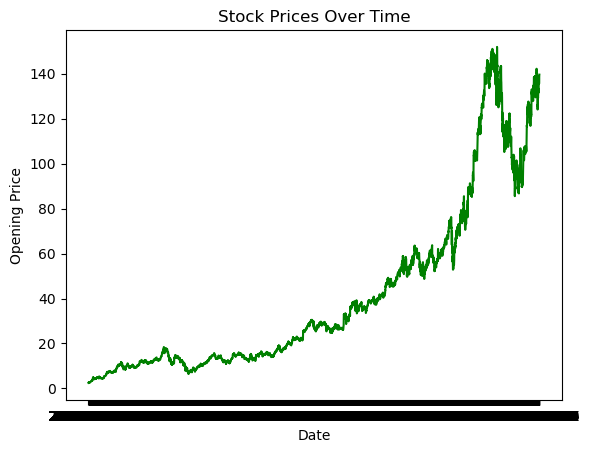

In [52]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Open'], color='green')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()

The Stock Prices Over Time graph shows how Google's opening stock prices changed over time. Just by looking at the picture, you can see that the prices have gone up a lot. This means that over the period shown, Google's opening prices have significantly increased. The graph makes it really clear and easy to see this big increase in prices.

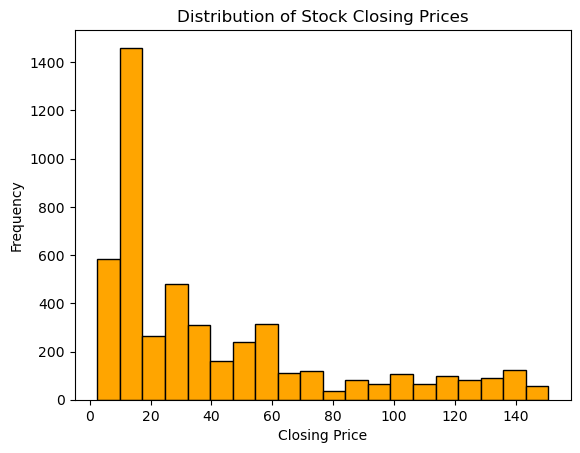

In [51]:
import matplotlib.pyplot as plt

plt.hist(df['Close'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Stock Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

The histogram of stock closing prices gives us a clear picture of how these prices are spread across different ranges. This visualization is helpful for understanding the distribution patterns and spotting any unusual closing levels or outliers in the dataset.

**✅ Section 4: Data Science: In Markdown, explain at least one question you have about your dataset. Clearly state the questions you have and how you plan on using Python to answer them. This may involve cleaning or selecting a subset of the data. You can use any technique you learned in DISCOVERY that is beyond simple descriptive statistics. You can use regression, hypothesis testing, correlation, simulation, or ideas from any of the labs, MicroProjects, or lecture. In Python, do the data science! :)**

**Question:** Can we identify specific time periods during which Google's stock prices exhibit noticeable upward or downward trends, and what insights can be gained from these trends?

I am interested in understanding whether there are discernible upward or downward trends over specific periods. By using data analysis, it can guide and help me to understand the uncover specific periods when Google's stock prices significantly rise or fell. This is important because by identifyinng and understanding these patterns, we can gain a deeper comprehension of Google's market behavior.

**Plans:** 
1. Data Setup: Convert 'Date' to datetime format. Sort data by date for chronological order.

2. Trend Indicator: Calculate a rolling average for 'Close' prices.

3. Visualization: Plot original closing prices and rolling average.

4. Identify Trends: Visual inspection for noticeable trends. Optionally, use statistical methods.

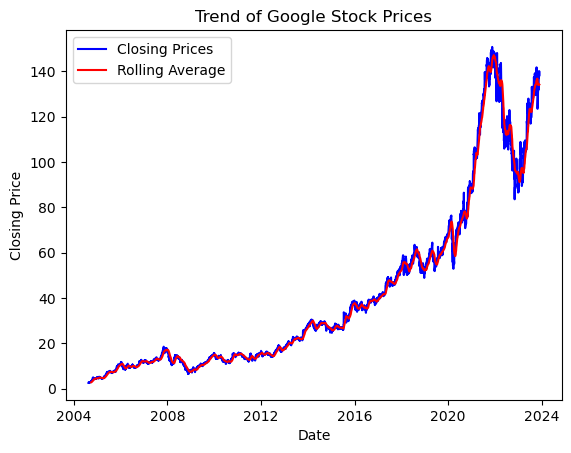

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['Rolling_Avg'] = df['Close'].rolling(window=30).mean()

plt.plot(df['Date'], df['Close'], label='Closing Prices', color='blue')
plt.plot(df['Date'], df['Rolling_Avg'], label='Rolling Average', color='red')

plt.title('Trend of Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**✅ Section 5: Overall Summary: In Markdown, summarize your dataset, findings, and visualization. A good summary shares a complete overview of your work in only 1-2 paragraphs without going low-level into the code. This might be the summary you would share in a future interview if someone asked you about "what is a data science project you did on your own?". Make sure to include at least 1-2 paragraphs for your summary (a paragraph is at least 5 sentences).**

I always wanted to identify the trend of stock market. This is the reason why I chose to analyze the historical data of Google stock prices. I was able to gather the data from Yahoo Finance. Google was my top choice because it is a major tech company. Analyzing its stock prices, can not only help me to gain insight into the tech industry but also the overall market.

In order to make this happen, I was able to find out the three highest opening stock prices. At the same time, I was able to calculate average and median stock prices for opening, high & low, explored quantiles, and detected outliers. By gathering this information, it helped me to have a comprehensive overview of the dataset. Also, visualization played a crucial role in analyzing the stock price. The plot graph showcased the data in pictures, making it easier to see patterns. A histogram showcased the distribution of closing prices, aiding in the identification of patterns and outliers within the dataset.

In summary, this project provided valuable insights into Google's stock performance. I believe I can use the same format to apply to other financial datasets. The methodologies can be found in gathering data analysis, visualization, and address the findings. It showcasing a versatile skill set in the realm of data science.